In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

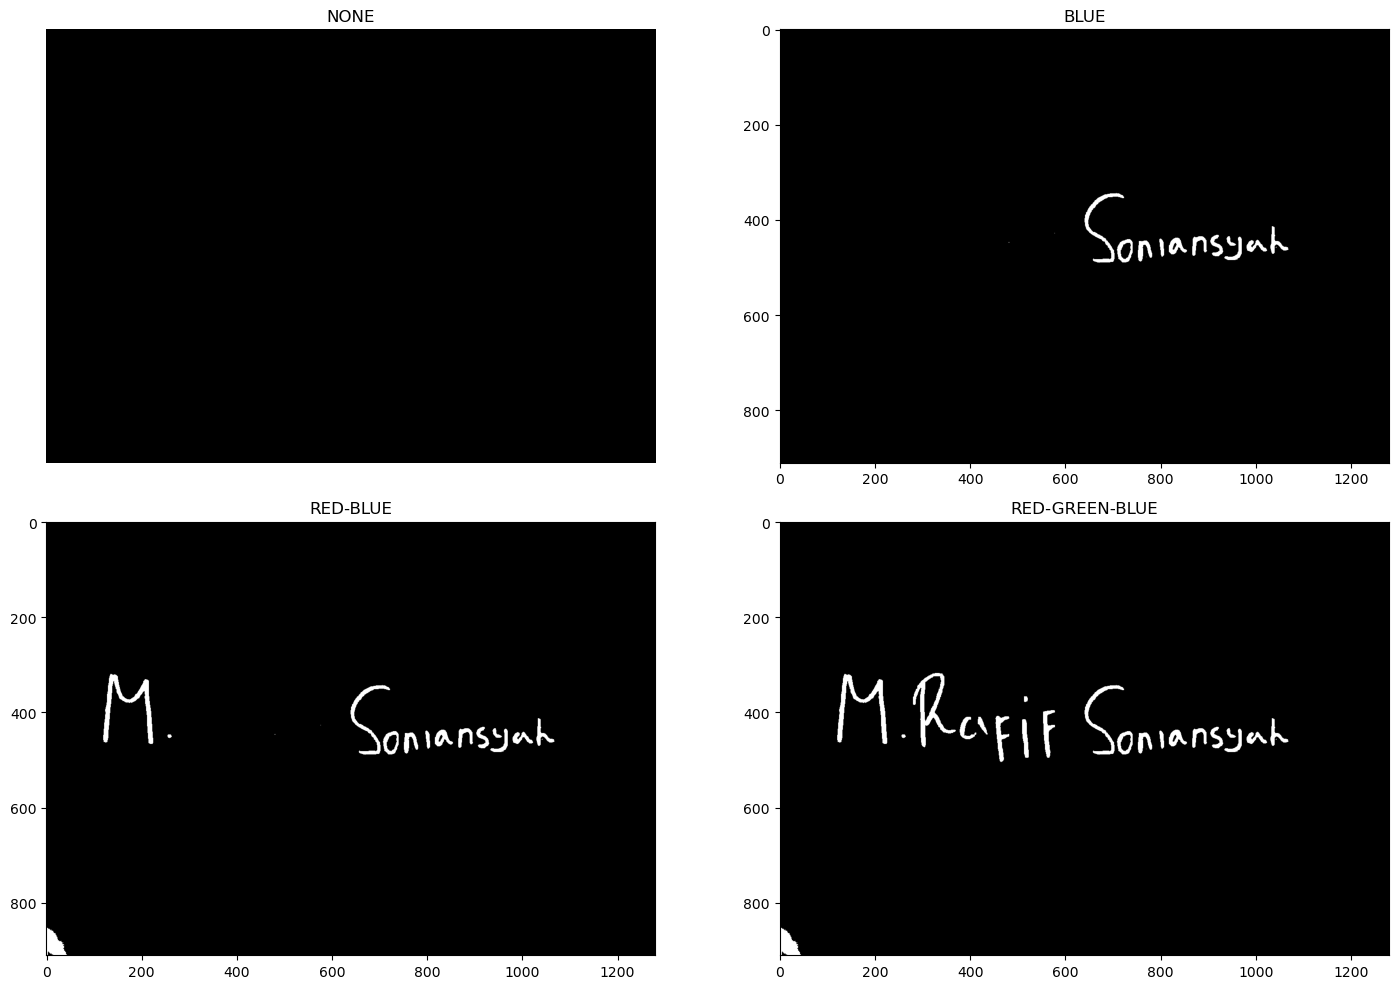

In [3]:
image = cv2.imread('nama.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Buat background hitam
background = np.zeros_like(image)

# Fungsi bantu untuk membuat mask HSV
def get_hsv_mask(hsv_img, lower, upper):
    mask = cv2.inRange(hsv_img, np.array(lower), np.array(upper))
    return mask

# Mask biru (hue sekitar 100–140)
blue_mask = get_hsv_mask(hsv, [100, 50, 50], [140, 255, 255])

# Mask merah (hue sekitar 0–10 dan 160–180)
red_mask1 = get_hsv_mask(hsv, [0, 50, 50], [10, 255, 255])
red_mask2 = get_hsv_mask(hsv, [160, 50, 50], [180, 255, 255])
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Mask hijau (hue sekitar 40–85) → dilebarkan range-nya
green_mask = get_hsv_mask(hsv, [35, 40, 40], [85, 255, 255])

# PERBAIKI: tambahkan dilasi kecil hanya untuk hijau
kernel = np.ones((2, 2), np.uint8)
green_mask_dilated = cv2.dilate(green_mask, kernel, iterations=1)

# Gabungkan sesuai kategori
# BLUE only
blue_image = background.copy()
blue_image[blue_mask > 0] = [255, 255, 255]

# RED + BLUE
red_blue_mask = cv2.bitwise_or(red_mask, blue_mask)
red_blue_image = background.copy()
red_blue_image[red_blue_mask > 0] = [255, 255, 255]

# RED + GREEN + BLUE (pakai green yang sudah didilate)
rgb_mask = cv2.bitwise_or(red_blue_mask, green_mask_dilated)
rgb_image = background.copy()
rgb_image[rgb_mask > 0] = [255, 255, 255]

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title("NONE")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
plt.title("BLUE")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(red_blue_image, cv2.COLOR_BGR2RGB))
plt.title("RED-BLUE")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RED-GREEN-BLUE")
plt.axis('on')

plt.tight_layout()
plt.show()
